<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Models" data-toc-modified-id="Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Altitude-->-temp" data-toc-modified-id="Altitude-->-temp-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Altitude -&gt; temp</a></span></li><li><span><a href="#Temp-->-Altitude" data-toc-modified-id="Temp-->-Altitude-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Temp -&gt; Altitude</a></span></li></ul></li></ul></div>

In [21]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind, spearmanr
from lightgbm import LGBMRegressor

In [4]:
df = pd.read_csv("/Users/luis.moneda/Documents/datasets/altitude-temperature/temp-alt-2020.csv")

In [25]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rcParams['legend.fontsize'] = 12
    
    
set_style()

## Models

### Altitude -> temp

In [15]:
alt_temp_model = LGBMRegressor()
alt_temp_model.fit(df["altitude"].values.reshape(-1, 1), df["temperature"].values)

LGBMRegressor()

In [16]:
alt_temp_residuals = df["temperature"].values - alt_temp_model.predict(df["altitude"].values.reshape(-1, 1))

In [17]:
alt_temp_residuals

array([-1.02600262e-01,  3.84096765e+00,  3.74327290e+00,  5.39962758e+00,
       -2.06897477e+00, -5.02997179e+00,  2.80467867e+00, -3.59547145e+00,
        5.20536042e-01,  1.08635740e+00,  1.85428916e+00, -1.09613835e+00,
        7.60051143e-01,  4.17901973e+00,  5.64181625e-01, -5.03893631e+00,
        3.45418299e-01, -4.71971577e+00, -2.52931825e-01,  1.77648101e+00,
        2.09200330e-01, -3.85999813e+00,  1.58861058e+00,  2.77572766e-01,
       -3.62572487e+00,  9.60272009e-01,  2.12928264e+00,  1.60377546e-01,
       -1.36333391e+00, -5.34524690e+00,  2.33208148e+00, -4.51957845e-01,
        2.32823278e+00, -9.57675332e-01,  2.09016920e+00, -2.56688654e+00,
       -2.34316602e+00, -3.62658504e+00, -3.47350810e+00,  8.96312212e-01,
       -2.48868680e+00,  8.28843851e-01,  5.18939151e-01, -4.54576436e+00,
        2.42678258e+00,  3.98329174e+00,  1.24874174e+00, -3.98027902e+00,
        7.54326300e-01, -4.35846436e+00,  3.12100302e+00,  3.77294508e+00,
       -1.15554250e+00, -

In [18]:
ttest_ind(alt_temp_residuals, df["altitude"].values.reshape(-1, 1))

Ttest_indResult(statistic=array([154.94700234]), pvalue=array([0.]))

In [19]:
spearmanr(alt_temp_residuals, df["altitude"].values.reshape(-1, 1))

SpearmanrResult(correlation=0.004213984027840807, pvalue=0.9201775813227773)

Text(0, 0.5, 'Residuals of f(altitude)')

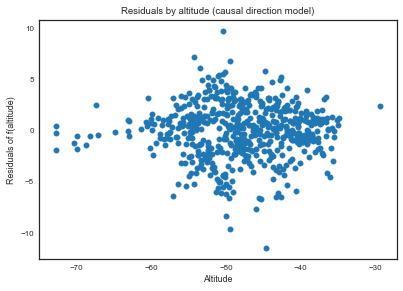

In [26]:
plt.scatter( df["altitude"].values.reshape(-1, 1), alt_temp_residuals)
plt.title("Residuals by altitude (causal direction model)")
plt.xlabel("Altitude")
plt.ylabel("Residuals of f(altitude)")

### Temp -> Altitude

In [27]:
temp_alt_model = LGBMRegressor()
temp_alt_model.fit(df["temperature"].values.reshape(-1, 1), df["altitude"].values)

LGBMRegressor()

In [28]:
temp_alt_residuals = df["altitude"].values - alt_temp_model.predict(df["temperature"].values.reshape(-1, 1))

In [29]:
ttest_ind(temp_alt_residuals, df["temperature"].values.reshape(-1, 1))

Ttest_indResult(statistic=array([-305.04054407]), pvalue=array([0.]))

In [30]:
spearmanr(temp_alt_residuals, df["temperature"].values.reshape(-1, 1))

SpearmanrResult(correlation=0.0770932959600996, pvalue=0.0663530805786339)

Text(0, 0.5, 'Residuals of f(temperature)')

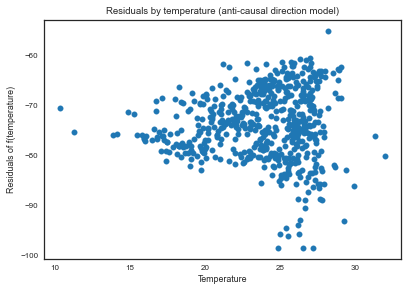

In [31]:
plt.scatter(df["temperature"].values.reshape(-1, 1), temp_alt_residuals)
plt.title("Residuals by temperature (anti-causal direction model)")
plt.xlabel("Temperature")
plt.ylabel("Residuals of f(temperature)")

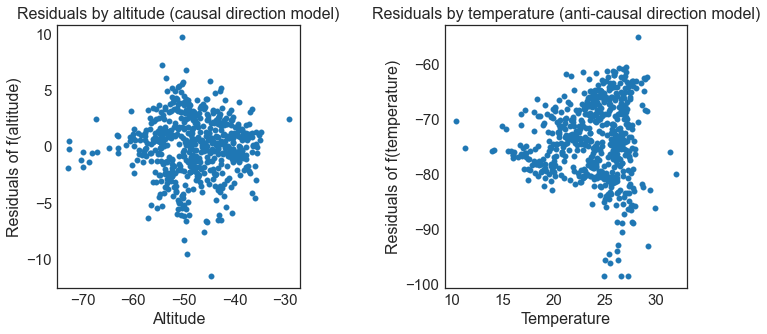

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].xaxis.set_tick_params(labelsize=15)
axes[0].yaxis.set_tick_params(labelsize=15)

axes[1].xaxis.set_tick_params(labelsize=15)
axes[1].yaxis.set_tick_params(labelsize=15)
    
axes[0].scatter( df["altitude"].values.reshape(-1, 1), alt_temp_residuals)
axes[1].scatter(df["temperature"].values.reshape(-1, 1), temp_alt_residuals)

axes[0].set_title("Residuals by altitude (causal direction model)", fontsize=16)
axes[1].set_title("Residuals by temperature (anti-causal direction model)", fontsize=16)

axes[0].set_xlabel("Altitude", fontsize=16)
axes[1].set_xlabel("Temperature", fontsize=16)

axes[0].set_ylabel("Residuals of f(altitude)", fontsize=16)
axes[1].set_ylabel("Residuals of f(temperature)", fontsize=16) 


fig.tight_layout(pad=2)
plt.subplots_adjust(wspace=0.6)
plt.savefig("../images/concepts__icm__residuals.eps", format="eps")